### Course 2: Project Report

- Overview
- Description of Data Set
- Data Exploration
 - Data Cleaning
 - Feature Engineering
- Models
 - Linear Model
 - Polynomial Model
 - Lasso Regression Model
 - Ridge Regression Model
- Best Model
- Key Findings and Insights
- Suggestions for Next Step

### Overview

- To Develop A Model to Calculate Selling Price Old AutoMobile.
- Our Model Will Focus On Prediction

### Description of Data Set
This data set consists of three types of entities:
- (a) the specification of an auto in terms of various characteristics.
- (b) its assigned insurance risk rating
- (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

**Attribute Information:**

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.



### Data Exploration 


When we see our data set we find that some of columns contains missing values
num-of-doors: 2 missing values,
normalized-losses: 41 missing values,
bore: 4 missing values,
stroke: 4 missing values,
horsepower: 2 missing values,
peak-rpm: 2 missing values,
price: 4 missing values.

Therefore we 

In [1]:
import warnings
warnings.filterwarnings('ignore', module='sklearn')

In [2]:
import os, pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns

In [3]:
datapath = ['Data']
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
filepath = os.sep.join(datapath+['imports-85.csv'])
data = pd.read_csv(filepath,header=None)
data.columns=headers

### Data Exploration

In [4]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Dealing With Missing Data
- **Data Cleaning**
- **Feature Engineering**

In [5]:
data.replace('?',np.nan,inplace=True)

In [6]:
missing_data = data.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa


**Replace By Frequency**
- `num-of-doors`: 2 missing values

**"Replace By Mean"**
- `normalized-losses`: 41 missing values 
- `bore`: 4 missing values
- `stroke`: 4 missing values
- `horsepower`: 2 missing values
- `peak-rpm`: 2 missing values

**Drop**
- `price`: 4 missing values

In [7]:
data["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [8]:
data['num-of-doors'].replace(np.nan,"four",inplace=True)

In [9]:
df= ['normalized-losses','bore','stroke','horsepower','peak-rpm']

for column in df:
    avg = data[column].astype('float').mean(axis=0)
    data[column].replace(np.nan,avg,inplace=True)

In [10]:
data.dropna(subset=['price'],axis=0,inplace=True)
data.reset_index(drop=True,inplace=True)

#### Correcting DataFormat

In [11]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [12]:
data[["bore", "stroke"]] = data[["bore", "stroke"]].astype("float")
data[["normalized-losses"]] = data[["normalized-losses"]].astype("int")
data[["price"]] = data[["price"]].astype("float")
data[["peak-rpm"]] = data[["peak-rpm"]].astype("float")

**Feature Engineering**

In [13]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = data.dtypes[data.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

# Here we see another way of one-hot-encoding:
# Encode these columns as categoricals so one hot encoding works on split data (if desired)
for col in one_hot_encode_cols:
    data[col] = pd.Categorical(data[col])

# Do the one hot encoding
data = pd.get_dummies(data, columns=one_hot_encode_cols)

C:\Users\ashad\AppData\Local\Temp/ipykernel_6548/541837702.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  one_hot_encode_cols = data.dtypes[data.dtypes == np.object]  # filtering by string categoricals


In [14]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

In [15]:
# Create a list of float colums to check for skewing
mask = data.dtypes == np.float
float_cols = data.columns[mask]

C:\Users\ashad\AppData\Local\Temp/ipykernel_6548/2592716327.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = data.dtypes == np.float


In [16]:
skew_limit = 0.75
skew_vals = train[float_cols].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))
skew_cols

,Skew
compression-ratio,2.704644
price,1.992907
wheel-base,1.134976
width,0.843971
stroke,-0.943292


In [17]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

for col in skew_cols.index.tolist():
    if col == "price":
        continue
    train[col] = np.log1p(train[col])
    test[col]  = test[col].apply(np.log1p)  # same thing

In [18]:
data.shape

(201, 133)

### Model Development

In [19]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

In [20]:
feature_cols = [x for x in train.columns if x != 'price']
X_train = train[feature_cols]
y_train = train['price']

X_test  = test[feature_cols]
y_test  = test['price']

In [21]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [22]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

37313.09358238874


In [23]:
Linear_R2=linearRegression.score(X_test,y_test)

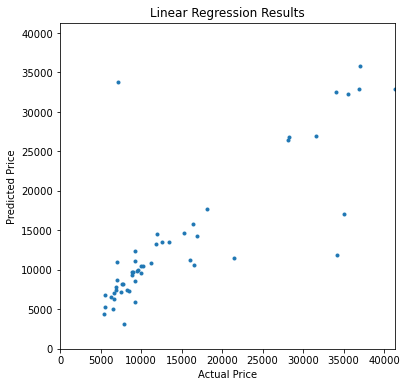

In [24]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

In [25]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_rmse)

1.0 2337.2731403097578


In [26]:
Ridge_R2=ridgeCV.score(X_test,y_test)
Ridge_R2

0.9423699739597436

In [27]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower

1e-05 6004.287245215057


In [28]:
Lasso_R2=lassoCV.score(X_test,y_test)
Lasso_R2

0.6196768155049088

In [29]:
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), 
                                                               len(lassoCV.coef_.nonzero()[0])))

Of 132 coefficients, 122 are non-zero with Lasso.


In [30]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

0.0005 0.1 2189.2802620922403


In [31]:
ElasticNet_R2=elasticNetCV.score(X_test,y_test)
ElasticNet_R2

0.9494370268936045

In [32]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,37313.093582
Ridge,2337.273140
Lasso,6004.287245
ElasticNet,2189.280262


In [33]:
rmse_vals = [Linear_R2, Ridge_R2, Lasso_R2, ElasticNet_R2]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'R2'}, inplace=1)
rmse_df

,R2
Linear,-13.687653
Ridge,0.942370
Lasso,0.619677
ElasticNet,0.949437


In [34]:
# Import SGDRegressor and prepare the parameters

from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(eta0=1e-7, **parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD-learningrate'] = pd.Series(new_rmses)
rmse_df

,R2,RMSE-SGD-learningrate
Linear,-13.687653,6050.692294
Ridge,0.942370,6535.620499
Lasso,0.619677,6268.947418
ElasticNet,0.949437,6495.842887


In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

,R2,RMSE-SGD-learningrate,RMSE-SGD-scaled
Linear,-13.687653,6050.692294,2412.523514
Ridge,0.942370,6535.620499,9569.520945
Lasso,0.619677,6268.947418,2381.968045
ElasticNet,0.949437,6495.842887,2355.558231


In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

,R2,RMSE-SGD-learningrate,RMSE-SGD-scaled
Linear,-13.687653,6050.692294,2337.776013
Ridge,0.942370,6535.620499,9664.782987
Lasso,0.619677,6268.947418,2684.012290
ElasticNet,0.949437,6495.842887,2529.599374


In [37]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

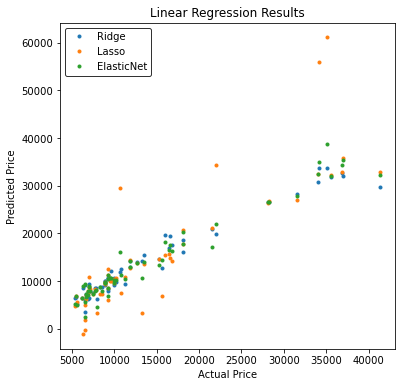

In [38]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Linear Regression Results');